# Boomer classification

# Import requirements

In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import statistics
import numpy as np

# Reproducibility
random_state=42

# Load dataframes

In [3]:
# Load dataframe
df_boomer_non_boomer = pd.read_csv("boomer_non_boomer.csv")
df_non_boomer = df_boomer_non_boomer[df_boomer_non_boomer["boomer"]==0]
df_boomer = df_boomer_non_boomer[df_boomer_non_boomer["boomer"]==1]

cols_to_print = ["numero di foto di buongiorno","numero di like per foto","numero di commenti per foto","boomer"]


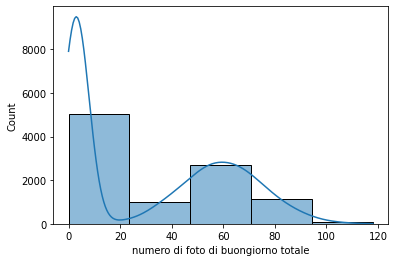

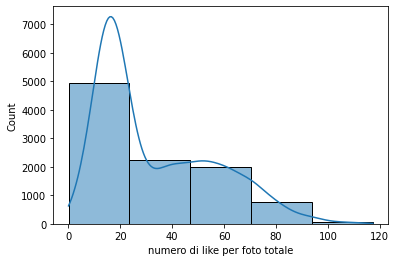

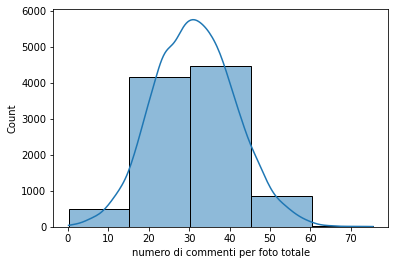

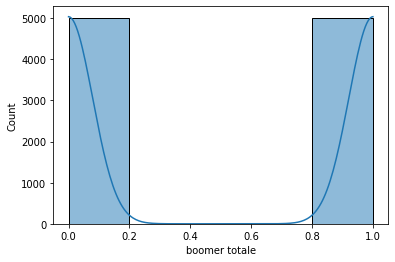

In [4]:
for i, feature in enumerate(cols_to_print):
    #sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
    plt.figure(i)
    sns.histplot(
        df_boomer_non_boomer[feature], bins=5, kde=True,
    ).set(xlabel='%s totale' % feature, ylabel='Count')


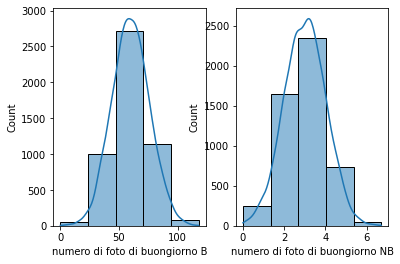

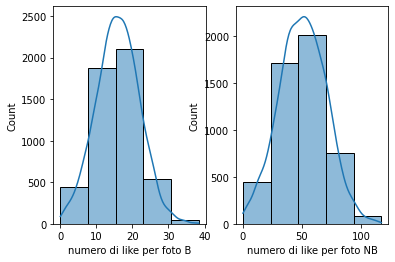

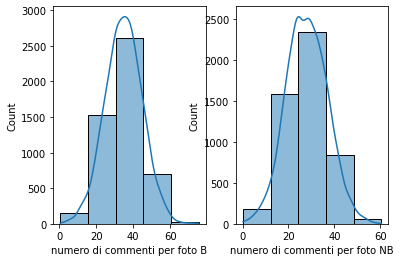

In [5]:
for i, feature in enumerate(cols_to_print[:-1]):
    #sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
    plt.figure(i)
    plt.subplot(1, 2, 1)
    sns.histplot(
        df_boomer[feature], bins=5, kde=True,
    ).set(xlabel='%s B' % feature, ylabel='Count')
    plt.subplot(1, 2, 2)
    sns.histplot(
        df_non_boomer[feature], bins=5, kde=True,
    ).set(xlabel='%s NB' % feature, ylabel='Count')

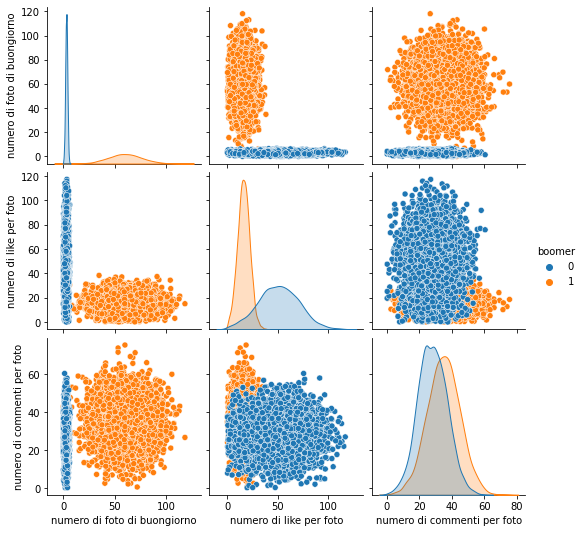

In [6]:
# Plot relationship in all the dataset
sns.pairplot(df_boomer_non_boomer[cols_to_print], hue='boomer')

for i, features in enumerate(itertools.combinations(cols_to_print, 2)):
    plt.figure(i)
    sns.scatterplot(data=df_boomer_non_boomer, x=features[0], y=features[1], hue="boomer",style="boomer", alpha=0.2)


# Classification

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def split_and_classify(df, feature, target):
    X = pd.DataFrame(df[feature])
    y = pd.DataFrame(df[target])
    model = LogisticRegression()
    scores = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print("Adopting feature \033[1m%s\033[0m we reached an accuracy of \033[1m%s\033[0m" %(feature,score))
    y_pred  = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(cf_matrix)

# Linear regression

In [8]:
for feature in cols_to_print[:-1]:
    split_and_classify(df=df_boomer_non_boomer,feature=feature,target="boomer")

Adopting feature numero di foto di buongiorno we reached an accuracy of 0.9993939393939394
[[1622    0]
 [   2 1676]]
Adopting feature numero di like per foto we reached an accuracy of 0.9293939393939394
[[1448  174]
 [  59 1619]]
Adopting feature numero di commenti per foto we reached an accuracy of 0.6527272727272727
[[1096  526]
 [ 620 1058]]


# Multiple linear regression

In [9]:
for features in itertools.combinations(cols_to_print[:-1],2):
    split_and_classify(df=df_boomer_non_boomer,feature=list(features),target="boomer")

Adopting feature ['numero di foto di buongiorno', 'numero di like per foto'] we reached an accuracy of 0.9993939393939394
[[1622    0]
 [   2 1676]]
Adopting feature ['numero di foto di buongiorno', 'numero di commenti per foto'] we reached an accuracy of 0.9993939393939394
[[1622    0]
 [   2 1676]]
Adopting feature ['numero di like per foto', 'numero di commenti per foto'] we reached an accuracy of 0.9303030303030303
[[1457  165]
 [  65 1613]]


In [10]:
for features in itertools.combinations(cols_to_print[:-1],3):
    split_and_classify(df=df_boomer_non_boomer,feature=list(features),target="boomer")

Adopting feature ['numero di foto di buongiorno', 'numero di like per foto', 'numero di commenti per foto'] we reached an accuracy of 0.9993939393939394
[[1622    0]
 [   2 1676]]


# Visualize coefficients

numero di foto di buongiorno
Adopting feature numero di foto di buongiorno we reached an accuracy of 1.0
[[1647    0]
 [   0   48]]


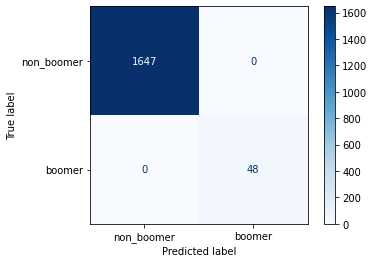

      numero di foto di buongiorno
7627                      3.328062
8751                      3.021402
8099                      3.799861
6971                      4.035034
7939                      3.483448
...                            ...
6979                      1.829002
7471                      2.946663
6738                      3.100975
6214                      5.099018
7507                      1.864243

[1695 rows x 1 columns]
300


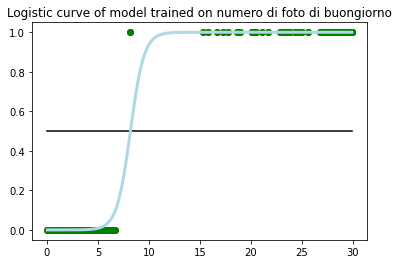

In [70]:
feature = "numero di foto di buongiorno"
print(feature)
values_range = (0,30)
#df_boomer_non_boomer = df_boomer_non_boomer[df_boomer_non_boomer[feature]>=values_range[0]][df_boomer_non_boomer[feature]<=values_range[1]]

X = pd.DataFrame(df_boomer_non_boomer[feature])
y = pd.DataFrame(df_boomer_non_boomer["boomer"])
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
#print(y_test["boomer"].value_counts())
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Adopting feature \033[1m%s\033[0m we reached an accuracy of \033[1m%s\033[0m" %(feature,score))
y_pred  = model.predict(X_test)
# CONFUSION MATRIX
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
plot_confusion_matrix(model, X_test, y_test,display_labels=["non_boomer","boomer"],
                             cmap=plt.cm.Blues)
plt.show() 
plt.clf()
plt.scatter(X_test[feature], y_test["boomer"], color="red")
predictions = model.predict(X_test)
plt.title("Predictions of model trained on %s" % feature)
plt.scatter(X_test, predictions, color='green')
#plt.show()
# plot logistic regression
#plt.clf()
# print(np.array(X_test[feature]).reshape(-1, 1).size)
print(X_test)
X_test = np.linspace(min(X_test[feature]), max(X_test[feature]), 300)
loss = expit(np.array(X_test) * model.coef_ + model.intercept_).ravel()
print(len(loss))
plt.plot(X_test, [0.5]*len(X_test), 'black')  # solid green
plt.plot(X_test, loss, color='lightblue', linewidth=3)
plt.title("Logistic curve of model trained on %s" % feature)
plt.show()

# Data standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df_std = pd.DataFrame(std_scaler.fit_transform(df_cars), columns=df_cars.columns)